# **Deep Learning Based Skin Disease Classification**

---
### **Abstract**
***This project presents an evaluation of skin disease classification using Convolutional Neural Networks.It aims to build a model that provides effective classification of Psoriasis and Melanoma using CNN. CNN & ResNets9 Architecture have been trained and validated using a public dataset of 1169 images consisting of 2 types of skin diseases: Psoriasis & Melanoma.***
### **Data Collection**
***I came across a huge IMBALANCED dataset from https://dermnetnz.org/ comprising more than 15000 labelled skin disease images belonging to 23 different types. Finally, images of 2 class of diseases have been extracted(Psoriasis & Melanoma) and performed image classification over a total of 1169 images in which 938 are used for training, 221 for validation and 10 new images for testing model’s accuracy on new unseen data.***

**Dataset Link: https://www.kaggle.com/datasets/shubhamgoel27/dermnet**



In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.utils import make_grid
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/MyDrive/Derm_2_classes'
print('Types/Class of Diseases in the data-set :')
os.listdir(dataset_path+'/train')

Types/Class of Diseases in the data-set :


['Psoriasis', 'Melanoma Skin Cancer Nevi and Moles']

In [5]:
Psoriasis_train_files = os.listdir(dataset_path+'/train'+"/Psoriasis")
Psoriasis_valid_files = os.listdir(dataset_path+'/validation'+"/Psoriasis")
print('\nNo. of training set samples for Psoriasis pictures  : ', len(Psoriasis_train_files))
print('No. of validation set samples for Psoriasis pictures  : ', len(Psoriasis_valid_files))
print(Psoriasis_train_files[:40])

Melanoma_Skin_Cancer_Nevi_Moles_train_files = os.listdir(dataset_path+'/train'+"/Melanoma Skin Cancer Nevi and Moles")
Melanoma_Skin_Cancer_Nevi_Moles_valid_files = os.listdir(dataset_path+'/validation'+"/Melanoma Skin Cancer Nevi and Moles")
print('\nNo. of training set samples for Melanoma Skin Cancer Nevi and Moles : ', len(Melanoma_Skin_Cancer_Nevi_Moles_train_files))
print('No. of validation set samples for Melanoma Skin Cancer Nevi and Moles : ', len(Melanoma_Skin_Cancer_Nevi_Moles_valid_files))
print(Melanoma_Skin_Cancer_Nevi_Moles_train_files[:40])



No. of training set samples for Psoriasis pictures  :  475
No. of validation set samples for Psoriasis pictures  :  110
['08PsoriasisIntertrigo.jpg', '08psoriasisIntertrig020606.jpg', '08PsoriasisOilSpot.jpg', '08PsoriasisPustular.jpg', '08lichenPlanusTongue1122052.jpg', '08PsoriasisOnycholysis1.jpg', '08PsoriasisPitting.jpg', '08PsoriasisIntertrigo1006.jpg', '08PsoriasisPinking2.jpg', '08PsoriasisOnycholysis.jpg', '08PsoriasisOnycholysis2.jpg', '08PsoriasisGroin.jpg', '08psoriasisIntertrig0206061.jpg', '08PsoriasisUmbilicus.jpg', '08PsoriasisPitting1.jpg', '08PsoriasisGroin1.jpg', '08PsoriasisNailSkin.jpg', 'Psoriasis-Cellulitis-1.jpg', 'Psoriasis-Chronic-Plaque-100.jpg', 'Psoriasis-Anus-3.jpg', 'Psoriasis-Anus-13.jpg', 'Psoriasis-Chronic-Plaque-102.jpg', 'Psoriasis-Chronic-Plaque-104.jpg', 'Psoriasis-Chronic-Plaque-109.jpg', 'Psoriasis-Anus-9.jpg', 'Psoriasis-Anus-8.jpg', 'Psoriasis-Anus-11.jpg', 'Psoriasis-Anus-10.jpg', 'Psoriasis-Anus-14.jpg', 'Psoriasis-Chronic-Plaque-107.jpg', '

In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
train_dataset =ImageFolder(dataset_path+'/train', transform=ToTensor())
validation_dataset = ImageFolder(dataset_path+'/validation', transform=ToTensor())
test_dataset = ImageFolder(dataset_path+'/test', transform=ToTensor())

In [7]:
Classes = train_dataset.classes
# Number of Images for each class
for i in Classes:
  train_images = os.listdir(dataset_path+'/train/' + i)
  img_count = len(train_images)
  print("Class [{}] has {} images".format(i, img_count))

Class [Melanoma Skin Cancer Nevi and Moles] has 463 images
Class [Psoriasis] has 475 images


In [8]:
print("Total number of classes or types of diseases in the dataset : ",len(train_dataset.classes))

Total number of classes or types of diseases in the dataset :  2


In [9]:
print("Size of training set : ",len(train_dataset))
print("Size of Validation set : ",len(validation_dataset))

Size of training set :  938
Size of Validation set :  221


In [10]:
img, label = train_dataset[0]
print(img.shape, label)
img

torch.Size([3, 489, 720]) 0


tensor([[[0.1569, 0.1490, 0.1647,  ..., 0.3294, 0.1451, 0.1294],
         [0.1922, 0.1765, 0.1922,  ..., 0.2314, 0.2235, 0.2471],
         [0.1843, 0.1725, 0.1882,  ..., 0.1255, 0.1686, 0.2118],
         ...,
         [0.7333, 0.6392, 0.5961,  ..., 0.5961, 0.6000, 0.6196],
         [0.7725, 0.6824, 0.6235,  ..., 0.5882, 0.6471, 0.6941],
         [0.6588, 0.7059, 0.7255,  ..., 0.6353, 0.6157, 0.6000]],

        [[0.1922, 0.1843, 0.2000,  ..., 0.3686, 0.1961, 0.1804],
         [0.2275, 0.2118, 0.2275,  ..., 0.2745, 0.2745, 0.2980],
         [0.2196, 0.2078, 0.2235,  ..., 0.1686, 0.2118, 0.2549],
         ...,
         [0.6863, 0.5922, 0.5412,  ..., 0.5412, 0.5490, 0.5686],
         [0.7255, 0.6275, 0.5686,  ..., 0.5333, 0.5961, 0.6431],
         [0.6118, 0.6510, 0.6706,  ..., 0.5804, 0.5647, 0.5490]],

        [[0.2118, 0.2039, 0.2196,  ..., 0.4039, 0.2275, 0.2118],
         [0.2471, 0.2314, 0.2471,  ..., 0.2980, 0.2980, 0.3216],
         [0.2392, 0.2275, 0.2431,  ..., 0.1843, 0.2275, 0.

### ***Visualising Data*** 

---



In [11]:
def show_sample(img, label):
    print('Label: ', train_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Melanoma Skin Cancer Nevi and Moles (0)


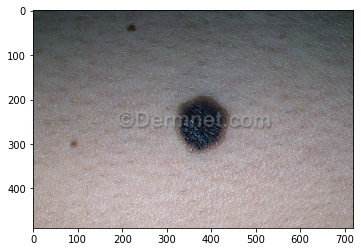

In [12]:
show_sample(*train_dataset[0])

Label:  Melanoma Skin Cancer Nevi and Moles (0)


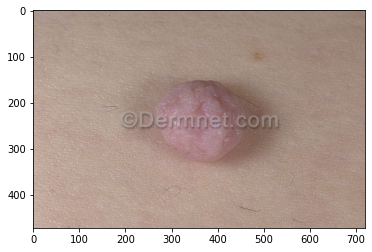

In [13]:
show_sample(*train_dataset[343])

Label:  Psoriasis (1)


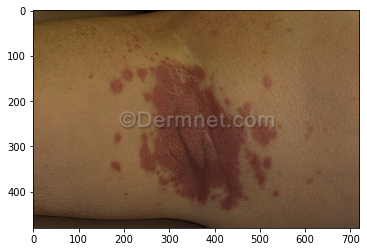

In [14]:
show_sample(*train_dataset[745])

Label:  Melanoma Skin Cancer Nevi and Moles (0)


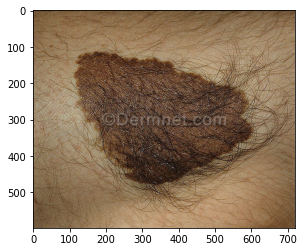

In [15]:
show_sample(*train_dataset[134])

Label:  Psoriasis (1)


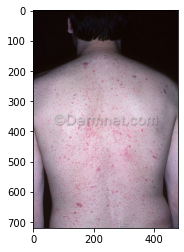

In [16]:
show_sample(*train_dataset[688])

### ***From the above sample images we can observe that our dataset does not contain equal size images. Therefore before training the model all images need to be resized.***

---



### **Data Normalization :**

---



In [17]:
import torchvision.transforms as transforms
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_transforms = transforms.Compose([
                         transforms.Resize([32, 32]),
                         transforms.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         transforms.RandomHorizontalFlip(), 
                         transforms.ToTensor(), 
                         transforms.Normalize(*stats,inplace=True)])
validation_transforms = transforms.Compose(
    [transforms.Resize([32,32]),
    transforms.ToTensor(), transforms.Normalize(*stats)])

In [18]:
train_ds = ImageFolder(dataset_path+'/train', train_transforms)
valid_ds = ImageFolder(dataset_path+'/validation', validation_transforms)
batch_size = 64

train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Random batch of images from the dataset :



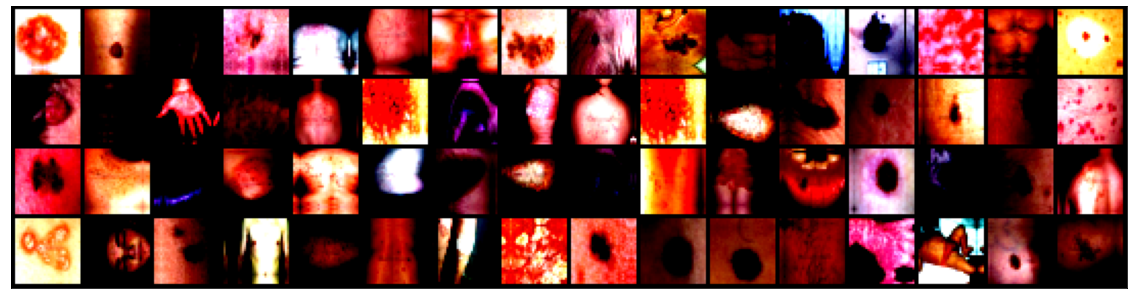

In [19]:
def show_batch(dl):
  for images, labels in dl:
        fig, ax = plt.subplots(figsize=(20,15))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
print("Random batch of images from the dataset :\n")
show_batch(train_dl)

In [20]:
img, label = train_ds[125]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[ 1.3898,  1.4867,  1.3510,  ...,  0.3817,  0.3817,  0.3817],
         [ 1.3510,  1.4091,  1.3122,  ...,  0.3430,  0.3817,  0.4011],
         [ 1.3704,  1.3510,  1.3316,  ...,  0.0522,  0.2267,  0.3042],
         ...,
         [ 0.3817,  0.1879, -0.0253,  ...,  0.1685,  0.1297,  0.1297],
         [ 0.2848, -0.1416, -0.3161,  ...,  0.1491,  0.1104,  0.1879],
         [ 0.3817,  0.1879, -0.0253,  ...,  0.1685,  0.1297,  0.1297]],

        [[ 0.8268,  0.9251,  0.7874,  ...,  0.0401,  0.0204,  0.0204],
         [ 0.7874,  0.8268,  0.7088,  ..., -0.0582, -0.0189,  0.0204],
         [ 0.8268,  0.7481,  0.6694,  ..., -0.3336, -0.1959, -0.1566],
         ...,
         [ 0.0598, -0.1369, -0.3926,  ..., -0.1959, -0.3139, -0.3139],
         [-0.0386, -0.5302, -0.7072,  ..., -0.2156, -0.3336, -0.2156],
         [ 0.0598, -0.1369, -0.3926,  ..., -0.1959, -0.3139, -0.3139]],

        [[ 0.9588,  1.0954,  0.9783,  ...,  0.1003,  0.1003,  0.1198],
         [ 0.9198,  0.9783,  0.9003,  ...,  0

### **Using a GPU**

---



In [21]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [22]:
device = get_default_device()
device

device(type='cuda')

In [23]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## **Applying Convolutional Neural Networks for binary classification**

In [24]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generating predictions
        loss = F.cross_entropy(out, labels) # Calculating cross entropy loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                   
        loss = F.cross_entropy(out, labels)  
        acc = accuracy(out, labels)           
        return {'Test_loss': loss.detach(), 'Test_accuracy': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['Test_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combining losses
        batch_accs = [x['Test_accuracy'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combining accuracies
        return {'Test_loss': epoch_loss.item(), 'Test_accuracy': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], Train_loss: {:.4f}, Test_loss: {:.4f}, Test_accuracy: {:.4f}".format(
            epoch, result['Train_loss'], result['Test_loss'], result['Test_accuracy']))

In [25]:
class CNN_model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential (
            #First chain of 2 Layers
            nn.Conv2d(3, 32, kernel_size=3, stride =1, padding=1),
            # Output size after convolution filter = [(W-F+2P)/S +1] = [(32 - 3+2)/1 + 1] = 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            #Second block /chain of 2 Layers
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

           #Third block /chain of 2 Layers
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
           # Total 6 convolutional layers have been applied 

            nn.Flatten(), # It takes the output feature map and flattens it out into a vector, 
            nn.Linear (256* 4 * 4, 1024),
            # we get 1024 outputs 
            nn.ReLU(),
            nn.Linear(1024, 512),
            # from 1024 inputs we get 512 outputs 
             nn.ReLU(),
            # from 512 inputs we finally get 2 outputs( no. of classes in the dataset)
             nn.Linear(512, 2)
            )
        
          # Therfore we have 6 Convolutional layers and 3 linear layers
    def forward(self, xb):
        return self.network(xb)

In [51]:
model = CNN_model()
model

CNN_model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1

### **Training the CNN Model**

---



In [52]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model. validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, test_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, test_loader)
        result['Train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [53]:
model = to_device(CNN_model(), device)

In [54]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.001

In [55]:
history = fit(num_epochs, lr, model, train_dl, valid_dl, opt_func)

Epoch [0], Train_loss: 0.7503, Test_loss: 0.6951, Test_accuracy: 0.4336
Epoch [1], Train_loss: 0.6760, Test_loss: 0.5701, Test_accuracy: 0.7514
Epoch [2], Train_loss: 0.6145, Test_loss: 0.5345, Test_accuracy: 0.7519
Epoch [3], Train_loss: 0.5401, Test_loss: 0.4664, Test_accuracy: 0.7993
Epoch [4], Train_loss: 0.5210, Test_loss: 0.4343, Test_accuracy: 0.7841
Epoch [5], Train_loss: 0.4878, Test_loss: 0.3670, Test_accuracy: 0.8251
Epoch [6], Train_loss: 0.4462, Test_loss: 0.3929, Test_accuracy: 0.8403
Epoch [7], Train_loss: 0.4207, Test_loss: 0.3486, Test_accuracy: 0.8398
Epoch [8], Train_loss: 0.4306, Test_loss: 0.3296, Test_accuracy: 0.8642
Epoch [9], Train_loss: 0.4039, Test_loss: 0.3275, Test_accuracy: 0.8618
Epoch [10], Train_loss: 0.4071, Test_loss: 0.3057, Test_accuracy: 0.8447
Epoch [11], Train_loss: 0.3839, Test_loss: 0.3495, Test_accuracy: 0.8584
Epoch [12], Train_loss: 0.4040, Test_loss: 0.3477, Test_accuracy: 0.8349
Epoch [13], Train_loss: 0.3741, Test_loss: 0.2873, Test_accur

In [56]:
def plot_accuracies(history):
    accuracies = [x['Test_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

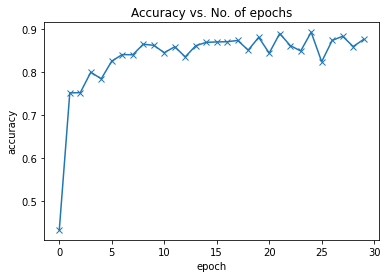

In [57]:
plot_accuracies(history)



---
### **Observation :**
---

***Our CNN model reaches a max accuracy of around 89.21% upto 25th Epoch***

---



### **Plot of training and validation losses to study the trend**

---



In [58]:
def plot_losses(history):
    train_losses = [x.get('Train_loss') for x in history]
    val_losses = [x['Test_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Testing'])
    plt.title('Loss vs. No. of epochs');

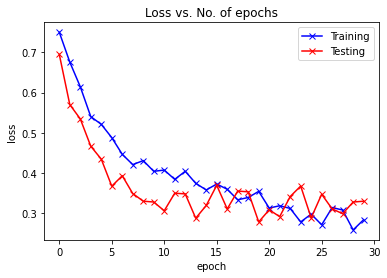

In [59]:
plot_losses(history)


### **Testing with individual images**

---



In [60]:
test_transforms = transforms.Compose(
    [transforms.Resize([32,32]),
    transforms.ToTensor(), transforms.Normalize(*stats)])
test_ds = ImageFolder(dataset_path+'/test', test_transforms)
test_dl = torch.utils.data.DataLoader(test_ds)

In [61]:
print("Size of Unseen images set : ",len(test_ds))

Size of Unseen images set :  10


In [62]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train_ds.classes[preds[0].item()]

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


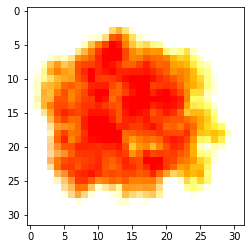

In [63]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


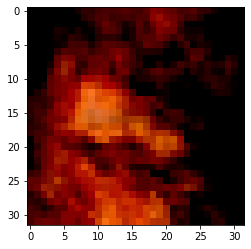

In [64]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Psoriasis


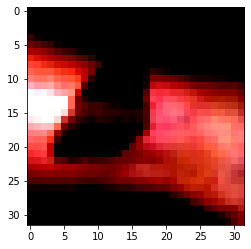

In [65]:
img, label = test_ds[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


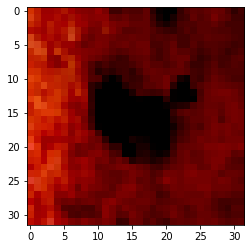

In [66]:
img, label = test_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


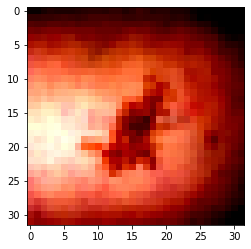

In [67]:
img, label = test_ds[4]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


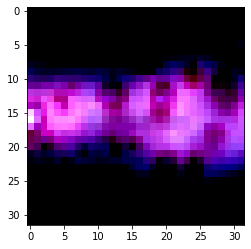

In [68]:
img, label = test_ds[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


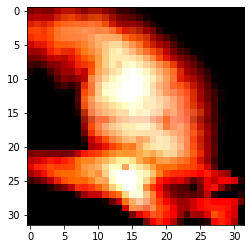

In [69]:
img, label = test_ds[6]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


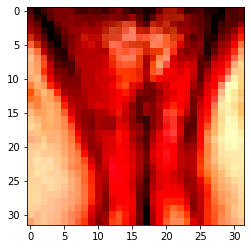

In [70]:
img, label = test_ds[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


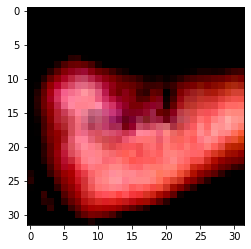

In [71]:
img, label = test_ds[8]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


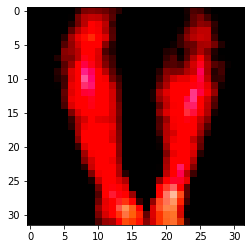

In [72]:
img, label = test_ds[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

### ***We can observe that out of 10 unseen images, we got 9 of them predicted correctly.***


## **Applying Residual Networks Architecture for Binary Classification**

In [73]:
train_ds = ImageFolder(dataset_path+'/train', train_transforms)
valid_ds = ImageFolder(dataset_path+'/validation', validation_transforms)
batch_size = 64

train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

In [74]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [75]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [76]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([64, 3, 32, 32])


In [77]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [78]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [79]:
model = to_device(ResNet9(3, 2), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### ***Training the ResNet9 model***

In [80]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [81]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 0.6867411136627197, 'val_acc': 0.56640625}]

In [82]:
epochs = 30
max_lr = 0.01
grad_clip = 0.2
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [83]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00066, train_loss: 0.8944, val_loss: 0.7689, val_acc: 0.6281
Epoch [1], last_lr: 0.00147, train_loss: 0.5437, val_loss: 0.5044, val_acc: 0.7870
Epoch [2], last_lr: 0.00274, train_loss: 0.5295, val_loss: 0.6051, val_acc: 0.7914
Epoch [3], last_lr: 0.00430, train_loss: 0.4967, val_loss: 0.4988, val_acc: 0.8286
Epoch [4], last_lr: 0.00598, train_loss: 0.5640, val_loss: 0.9913, val_acc: 0.7422
Epoch [5], last_lr: 0.00757, train_loss: 0.5852, val_loss: 0.3478, val_acc: 0.8359
Epoch [6], last_lr: 0.00886, train_loss: 0.5979, val_loss: 0.6041, val_acc: 0.8198
Epoch [7], last_lr: 0.00971, train_loss: 0.6923, val_loss: 2.1865, val_acc: 0.5977
Epoch [8], last_lr: 0.01000, train_loss: 0.6981, val_loss: 0.7172, val_acc: 0.7529
Epoch [9], last_lr: 0.00994, train_loss: 0.7089, val_loss: 0.9162, val_acc: 0.6242
Epoch [10], last_lr: 0.00978, train_loss: 0.6670, val_loss: 0.8699, val_acc: 0.7337
Epoch [11], last_lr: 0.00950, train_loss: 0.6751, val_loss: 0.4630, val_acc: 0.8139
Ep

In [84]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

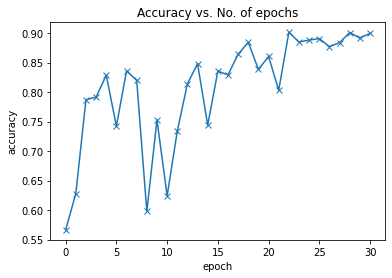

In [85]:
plot_accuracies(history)



---
### **Observation :**
---

***Our ResNets9 model reaches a max accuracy of around 90.13% upto 22nd Epoch***

---

In [86]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

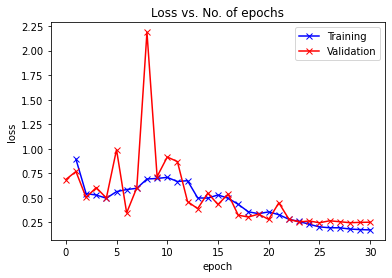

In [87]:
plot_losses(history)

In [88]:
import numpy as np
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

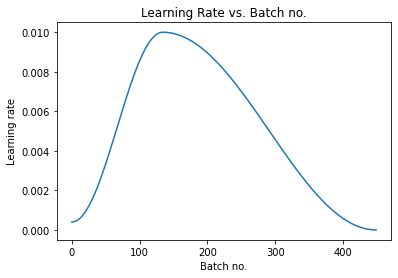

In [89]:
plot_lrs(history)

### ***As expected, the learning rate starts at a low value, and gradually increases for 30% of the iterations to a maximum value of 0.01, and then gradually decreases to a very small value.***

### ***Testing with individual images***

In [90]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


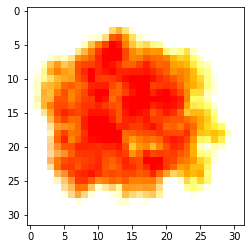

In [91]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


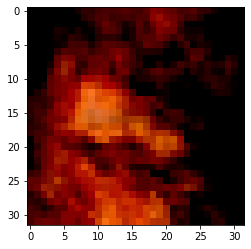

In [92]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


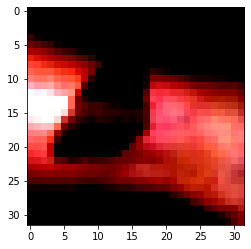

In [93]:
img, label = test_ds[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


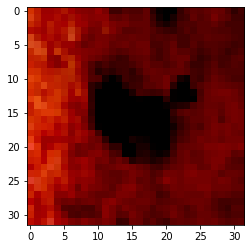

In [94]:
img, label = test_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


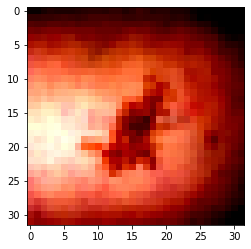

In [95]:
img, label = test_ds[4]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


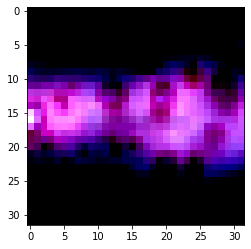

In [96]:
img, label = test_ds[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


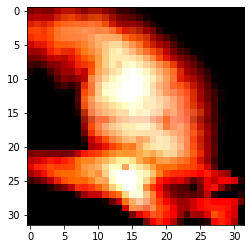

In [97]:
img, label = test_ds[6]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


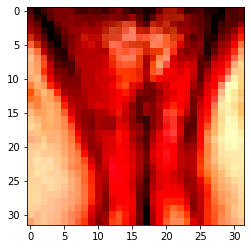

In [98]:
img, label = test_ds[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


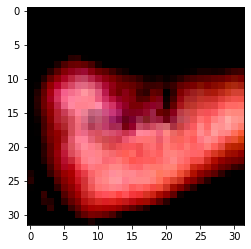

In [99]:
img, label = test_ds[8]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


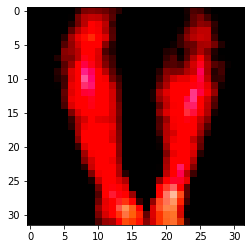

In [100]:
img, label = test_ds[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

### ***We can observe that out of 10 unseen images, we got all of them predicted correctly.***

### **Conclusion & Future Scope**

---


***ResNet9 along woth data augmentation is able to predict up to 2 diseases (Psoriasis and Melanoma) with a greater accuracy level of 90.13%. This demonstrates the enormous potential of Neural Networks for diagnosing skin diseases in the real world. The accuracy can be further improved by using even more advanced hardware and software, together with a very large dataset. Moreover, programmers can utilize the model to develop a smartphone application to diagnose these skin diseases easily and early. It will shorten the time between diagnosis and treatment, further work can be done to standardize this model for preliminary skin disease diagnosis.***

